In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("Nmap_detection.csv")

In [4]:
data.shape

(8581, 9)

In [5]:
data["port_scan_packet"].value_counts()

YES    5155
NO     3426
Name: port_scan_packet, dtype: int64

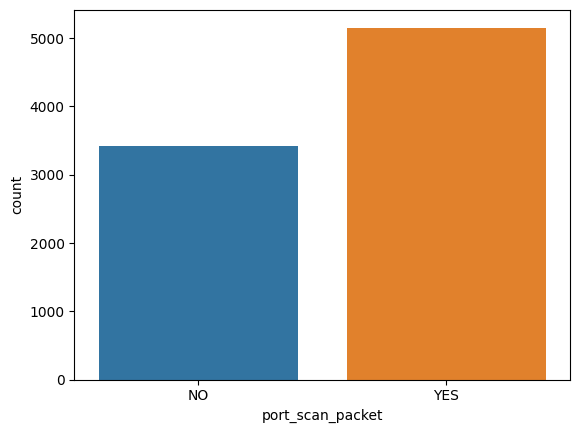

In [6]:
sns.countplot(x="port_scan_packet",data=data)
plt.show()

In [7]:
data

,SYN,ACK,PSH,URG,FIN,window_size,tcp.mss,sequence_no,port_scan_packet
0,1,0,0,0,0,64240,1460,0,NO
1,1,0,0,0,0,64240,1460,0,NO
2,1,0,0,0,0,64240,1460,0,NO
3,1,0,0,0,0,64240,1460,0,NO
4,1,0,0,0,0,64240,1460,0,NO
...,...,...,...,...,...,...,...,...,...
8576,0,33645,0,0,0,511,0,9997,NO
8577,0,33645,1,0,0,511,0,9997,NO
8578,0,33645,1,0,0,511,0,10033,NO
8579,0,10093,0,0,0,501,0,33645,NO


In [8]:
data['port_scan_packet'] = data['port_scan_packet'].map({"YES":1,"NO":0})

In [9]:
data.isnull().sum()

SYN                 0
ACK                 0
PSH                 0
URG                 0
FIN                 0
window_size         0
tcp.mss             0
sequence_no         0
port_scan_packet    0
dtype: int64

In [10]:
data.fillna(0, inplace=True)

In [11]:
data

,SYN,ACK,PSH,URG,FIN,window_size,tcp.mss,sequence_no,port_scan_packet
0,1,0,0,0,0,64240,1460,0,0
1,1,0,0,0,0,64240,1460,0,0
2,1,0,0,0,0,64240,1460,0,0
3,1,0,0,0,0,64240,1460,0,0
4,1,0,0,0,0,64240,1460,0,0
...,...,...,...,...,...,...,...,...,...
8576,0,33645,0,0,0,511,0,9997,0
8577,0,33645,1,0,0,511,0,9997,0
8578,0,33645,1,0,0,511,0,10033,0
8579,0,10093,0,0,0,501,0,33645,0


In [12]:
data['ACK'].unique()

array([    0,     1,   481, ..., 33469, 33645, 10093], dtype=int64)

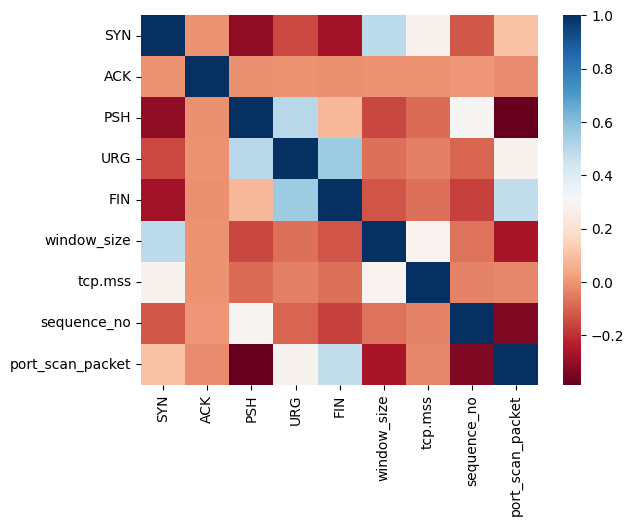

In [13]:
sns.heatmap(data.corr(),cmap="RdBu")
plt.show()


In [14]:
y = data['port_scan_packet']

In [15]:
y


0       0
1       0
2       0
3       0
4       0
       ..
8576    0
8577    0
8578    0
8579    0
8580    0
Name: port_scan_packet, Length: 8581, dtype: int64

In [16]:
data['tcp.mss'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8576    False
8577    False
8578    False
8579    False
8580    False
Name: tcp.mss, Length: 8581, dtype: bool

In [17]:
data.drop(columns='port_scan_packet',inplace=True)


In [18]:
x= data

In [19]:
x

,SYN,ACK,PSH,URG,FIN,window_size,tcp.mss,sequence_no
0,1,0,0,0,0,64240,1460,0
1,1,0,0,0,0,64240,1460,0
2,1,0,0,0,0,64240,1460,0
3,1,0,0,0,0,64240,1460,0
4,1,0,0,0,0,64240,1460,0
...,...,...,...,...,...,...,...,...
8576,0,33645,0,0,0,511,0,9997
8577,0,33645,1,0,0,511,0,9997
8578,0,33645,1,0,0,511,0,10033
8579,0,10093,0,0,0,501,0,33645


In [20]:
from sklearn.model_selection  import train_test_split


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
import joblib
joblib.dump(sc,'Scaleobjdata.pkl')


['Scaleobjdata.pkl']

In [21]:
x_test

array([[ 2.26878601, -0.01302974, -0.69048114, ..., -0.20791792,
         0.35193941, -0.28459838],
       [-0.44076435, -0.01302974, -0.69048114, ..., -0.20791792,
        -0.1221098 , -0.28454633],
       [-0.44076435, -0.0101563 , -0.69048114, ..., -0.24730594,
        -0.1221098 , -0.28454633],
       ...,
       [ 2.26878601, -0.01302974, -0.69048114, ..., -0.20791792,
         0.35193941, -0.28459838],
       [-0.44076435, -0.01302972, -0.69048114, ..., -0.20791792,
        -0.1221098 , -0.28454633],
       [ 2.26878601, -0.01302974, -0.69048114, ...,  4.66478959,
         0.35193941, -0.28459838]])

In [22]:
x

,SYN,ACK,PSH,URG,FIN,window_size,tcp.mss,sequence_no
0,1,0,0,0,0,64240,1460,0
1,1,0,0,0,0,64240,1460,0
2,1,0,0,0,0,64240,1460,0
3,1,0,0,0,0,64240,1460,0
4,1,0,0,0,0,64240,1460,0
...,...,...,...,...,...,...,...,...
8576,0,33645,0,0,0,511,0,9997
8577,0,33645,1,0,0,511,0,9997
8578,0,33645,1,0,0,511,0,10033
8579,0,10093,0,0,0,501,0,33645


In [23]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8576    0
8577    0
8578    0
8579    0
8580    0
Name: port_scan_packet, Length: 8581, dtype: int64

In [24]:
x_train

array([[-0.44076435, -0.01302974, -0.69048114, ..., -0.20791792,
        -0.1221098 , -0.28454633],
       [-0.44076435, -0.01302974,  1.44826549, ..., -0.20791792,
        -0.1221098 , -0.28454633],
       [ 2.26878601, -0.01302974, -0.69048114, ..., -0.20791792,
         0.35193941, -0.28459838],
       ...,
       [-0.44076435, -0.01219961, -0.69048114, ..., -0.24769135,
        -0.1221098 ,  0.24450202],
       [-0.44076435, -0.01282191, -0.69048114, ..., -0.24746011,
        -0.1221098 , -0.08213915],
       [-0.44076435, -0.01302972, -0.69048114, ..., -0.20791792,
        -0.1221098 , -0.28454633]])

In [26]:
from sklearn.linear_model import LogisticRegression

regressor = LogisticRegression(random_state=0)

In [27]:
regressor.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [28]:
y_pred = regressor.predict(x_test)

In [30]:
accuracy = []

In [31]:
from sklearn.metrics import accuracy_score,classification_report

print(accuracy_score(y_test,y_pred))
accuracy.append(accuracy_score(y_test,y_pred))


0.9526213592233009


In [1]:
print(classification_report(y_test,y_pred))

NameError: name 'classification_report' is not defined

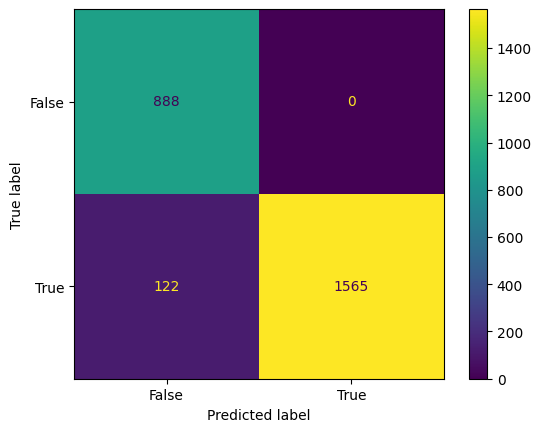

In [32]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_pred,y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()

In [23]:
x_test.shape

(2575, 8)

In [24]:
y_test.shape

(2575,)

In [25]:
import joblib
joblib.dump(regressor,'Logistic.pkl')

['Logistic.pkl']

In [1]:
import joblib 
predictor = joblib.load('Logistic.pkl')


In [48]:
from scapy.all import *
import subprocess
pkts = rdpcap('FTP_Normal_packets.pcapng')
one_pkt = pkts[14]

features = []

features.append(one_pkt[TCP].flags.S)
features.append(2)
features.append(one_pkt[TCP].flags.P)
features.append(one_pkt[TCP].flags.U)
features.append(one_pkt[TCP].flags.F)



window_size = one_pkt[TCP].window
mss = 0
if one_pkt[TCP].options:
    if one_pkt[TCP].options[0][1]:
        mss = one_pkt[TCP].options[0][1]

features.append(window_size)
features.append(mss)
features.append(932)

features = sc.transform([features])

regressor.predict(features)

C:\Users\abhid\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [1]:
pip show scikit-learn

Note: you may need to restart the kernel to use updated packages.
Name: scikit-learn
Version: 1.2.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\abhid\AppData\Roaming\Python\Python311\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: librosa


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [49]:
x_train

array([[-0.44076435, -0.01302974, -0.69048114, ..., -0.20791792,
        -0.1221098 , -0.28454633],
       [-0.44076435, -0.01302974,  1.44826549, ..., -0.20791792,
        -0.1221098 , -0.28454633],
       [ 2.26878601, -0.01302974, -0.69048114, ..., -0.20791792,
         0.35193941, -0.28459838],
       ...,
       [-0.44076435, -0.01219961, -0.69048114, ..., -0.24769135,
        -0.1221098 ,  0.24450202],
       [-0.44076435, -0.01282191, -0.69048114, ..., -0.24746011,
        -0.1221098 , -0.08213915],
       [-0.44076435, -0.01302972, -0.69048114, ..., -0.20791792,
        -0.1221098 , -0.28454633]])

In [31]:
import os 
os.system('')

0

In [26]:
import tensorflow as tf


In [27]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

ann.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [29]:
ann.fit(x_train,y_train,batch_size=10,epochs=10)

Epoch 1/10
601/601 [==============================] - 2s 2ms/step - loss: 0.4521 - accuracy: 0.8497
Epoch 2/10
601/601 [==============================] - 1s 1ms/step - loss: 0.2361 - accuracy: 0.9196
Epoch 3/10
601/601 [==============================] - 1s 1ms/step - loss: 0.1681 - accuracy: 0.9477
Epoch 4/10
601/601 [==============================] - 1s 2ms/step - loss: 0.1415 - accuracy: 0.9530
Epoch 5/10
601/601 [==============================] - 1s 1ms/step - loss: 0.1276 - accuracy: 0.9549
Epoch 6/10
601/601 [==============================] - 1s 1ms/step - loss: 0.1180 - accuracy: 0.9560
Epoch 7/10
601/601 [==============================] - 1s 1ms/step - loss: 0.1102 - accuracy: 0.9569
Epoch 8/10
601/601 [==============================] - 1s 1ms/step - loss: 0.1031 - accuracy: 0.9607
Epoch 9/10
601/601 [==============================] - 1s 1ms/step - loss: 0.0969 - accuracy: 0.9630
Epoch 10/10
601/601 [==============================] - 1s 1ms/step - loss: 0.0906 - accuracy: 0.9637

In [30]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 54        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
ann.save("NmapNetwork.h5")

C:\Users\abhid\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
y_ann_pred = ann.predict(x_test)
y_ann_pred = (y_ann_pred>0.5)
y_pred

81/81 [==============================] - 0s 1ms/step


array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [37]:
accuracy.append(accuracy_score(y_ann_pred,y_test))

In [72]:
from scapy.all import *
import subprocess
pkts = rdpcap('FTP_Normal_packets.pcapng')
one_pkt = pkts[14]

features = []

features.append(one_pkt[TCP].flags.S)
features.append(2)
features.append(one_pkt[TCP].flags.P)
features.append(one_pkt[TCP].flags.U)
features.append(one_pkt[TCP].flags.F)



window_size = one_pkt[TCP].window
mss = 0
if one_pkt[TCP].options:
    mss = one_pkt[TCP].options[0][1]

features.append(window_size)
features.append(mss)
features.append(932)

features = sc.transform([features])

prediction = ann.predict(features)
print(prediction>0.5)

C:\Users\abhid\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 28ms/step
[[False]]


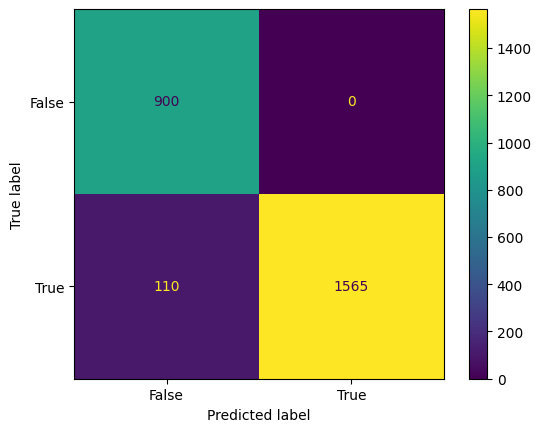

In [38]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_ann_pred,y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [39]:

dr = DecisionTreeClassifier(criterion="entropy",random_state=0,max_depth=1)
dr.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0)

In [24]:
drn = DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=1)
drn.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1, random_state=0)

In [26]:
from sklearn.metrics import accuracy_score
y_g_pred = drn.predict(x_test)
accuracy_score(y_g_pred,y_test)

0.9328155339805825

[Text(0.5, 0.75, 'x[5] <= -0.211\nentropy = 0.972\nsamples = 6006\nvalue = [2416, 3590]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 2060\nvalue = [2060, 0]'),
 Text(0.75, 0.25, 'entropy = 0.437\nsamples = 3946\nvalue = [356, 3590]')]

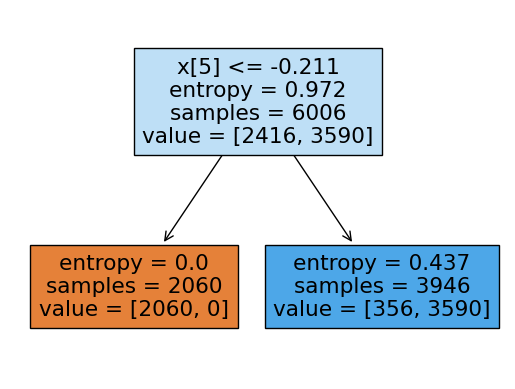

In [40]:
from sklearn.tree import plot_tree
plot_tree(dr,filled=True)

In [41]:
y_dr_pred = dr.predict(x_test)

In [42]:
y_dr_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [70]:
from scapy.all import *
import subprocess
pkts = rdpcap('FTP_Normal_packets.pcapng')
one_pkt = pkts[3]

features = []

features.append(one_pkt[TCP].flags.S)
features.append(one_pkt[TCP].flags.A)
features.append(one_pkt[TCP].flags.P)
features.append(one_pkt[TCP].flags.U)
features.append(one_pkt[TCP].flags.F)



window_size = one_pkt[TCP].window
mss = 0
if one_pkt[TCP].options:
    mss = one_pkt[TCP].options[0][1]

features.append(window_size)
features.append(mss)
features.append(1)

features = sc.transform([features])
dr.predict(features)

C:\Users\abhid\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [43]:
accuracy.append(accuracy_score(y_dr_pred,y_test))

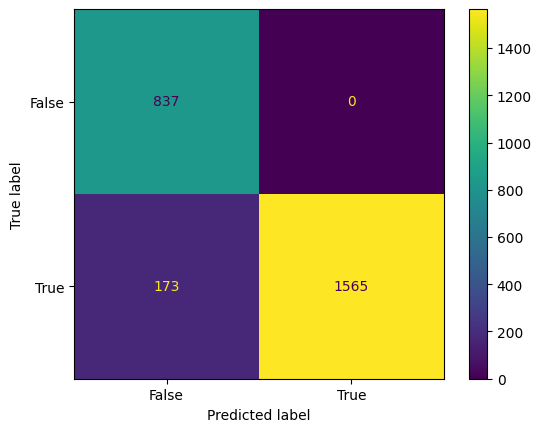

In [44]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_dr_pred,y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()

In [84]:
from sklearn.tree import export_graphviz
export_graphviz(
    dr,
    out_file="Final_tree.dot",
    feature_names=data.columns[:8],  # Assuming your features start from the third column
    class_names=data.columns[-1],
    rounded=True,
    filled=True
)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20,max_leaf_nodes=4,criterion="entropy",random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=4, n_estimators=20,
                       random_state=0)

In [46]:
y_rf_pred = rf.predict(x_test)
y_rf_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

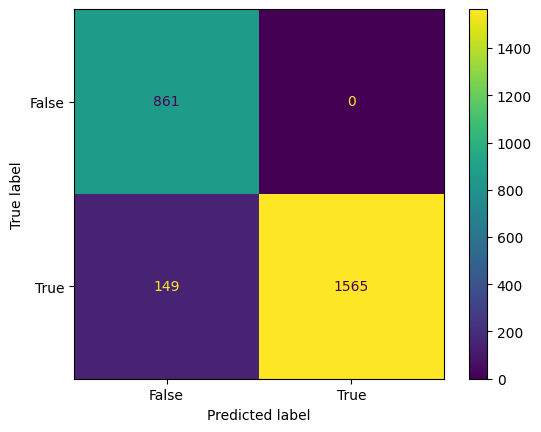

In [47]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_rf_pred,y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()

In [48]:
accuracy.append(accuracy_score(y_rf_pred,y_test))

In [49]:
from sklearn.svm import SVC
clf = SVC(kernel='linear',probability=True)
clf.fit(x_train,y_train)


SVC(kernel='linear', probability=True)

In [50]:
y_svc_pred = clf.predict(x_test)

In [51]:
accuracy.append(accuracy_score(y_svc_pred,y_test))

In [95]:
from scapy.all import *
import subprocess
pkts = rdpcap('FTP_Normal_packets.pcapng')
one_pkt = pkts[14]

features = []

features.append(one_pkt[TCP].flags.S)
features.append(one_pkt[TCP].flags.A)
features.append(one_pkt[TCP].flags.P)
features.append(one_pkt[TCP].flags.U)
features.append(one_pkt[TCP].flags.F)



window_size = one_pkt[TCP].window
mss = 0
if one_pkt[TCP].options:
    if one_pkt[TCP].options[0][1]:
        mss = one_pkt[TCP].options[0][1]

features.append(window_size)
features.append(mss)
features.append(932)

features = sc.transform([features])
rf.predict(features)

C:\Users\abhid\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [52]:
from sklearn.metrics import roc_curve,roc_auc_score


In [53]:
def plot_roc_curve(fpr, tpr, classifier,y_train,y_probs):
 score = roc_auc_score(y_train,y_probs)
 plt.plot(fpr, tpr, linewidth=2, label=classifier+"(AUC=%0.2f)" % score)
 plt.legend(loc="lower right")
 plt.plot([0, 1], [0, 1], 'k--')

In [54]:
y_probs_test = rf.predict_proba(x_test)[:,1]
y_probs_test

array([0.8341527 , 0.91023734, 0.43946894, ..., 0.8341527 , 0.91023734,
       0.59071085])

In [47]:
predictions = ann.predict(x_test)
# probability_pred =  tf.nn.softmax(predictions)
# probability_pred
predictions

81/81 [==============================] - 0s 2ms/step


array([[9.6657419e-01],
       [7.8875631e-01],
       [7.6274788e-01],
       ...,
       [9.6657419e-01],
       [7.8875619e-01],
       [1.0089345e-17]], dtype=float32)

81/81 [==============================] - 0s 1ms/step


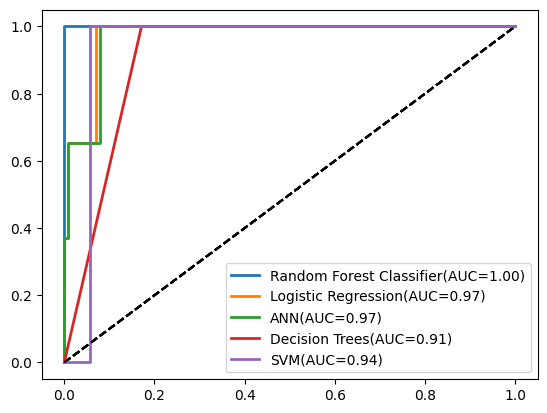

In [55]:
y_probs_test = rf.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"Random Forest Classifier",y_test,y_probs_test)

y_probs_test = regressor.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"Logistic Regression",y_test,y_probs_test)

# y_probs_test = ann.predict_proba(x_test)[:,1]
# fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
# plot_roc_curve(fpr,tpr,"ANN",y_test,y_probs_test)

predictions = ann.predict(x_test)
# probability_pred =  tf.nn.softmax(predictions)
fpr,tpr,threshold = roc_curve(y_test,predictions)
plot_roc_curve(fpr,tpr,"ANN",y_test,predictions)

y_probs_test = dr.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"Decision Trees",y_test,y_probs_test)

y_probs_test = clf.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"SVM",y_test,y_probs_test)


plt.show()



In [57]:
from sklearn.ensemble import VotingClassifier

In [58]:
voting_clf = VotingClassifier(estimators=[('rf',rf),('lg',regressor),('dr',dr),('svm',clf)],voting='hard')
voting_clf.fit(x_train,y_train)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_leaf_nodes=4,
                                                     n_estimators=20,
                                                     random_state=0)),
                             ('lg', LogisticRegression(random_state=0)),
                             ('dr',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=1,
                                                     random_state=0)),
                             ('svm', SVC(kernel='linear', probability=True))])

In [59]:
voting_pred =  voting_clf.predict(x_test)

In [61]:
accuracy.append(accuracy_score(voting_pred,y_test))

In [62]:
joblib.dump(voting_clf,'VotingClassifier.pkl')

['VotingClassifier.pkl']

81/81 [==============================] - 0s 1ms/step


AttributeError: predict_proba is not available when voting='hard'

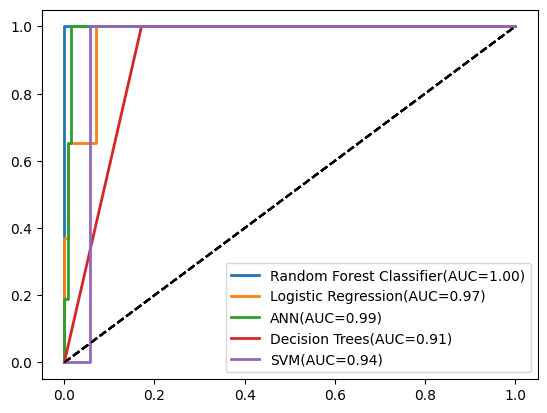

In [53]:
y_probs_test = rf.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"Random Forest Classifier",y_test,y_probs_test)

y_probs_test = regressor.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"Logistic Regression",y_test,y_probs_test)

# y_probs_test = ann.predict_proba(x_test)[:,1]
# fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
# plot_roc_curve(fpr,tpr,"ANN",y_test,y_probs_test)

predictions = ann.predict(x_test)
# probability_pred =  tf.nn.softmax(predictions)
fpr,tpr,threshold = roc_curve(y_test,predictions)
plot_roc_curve(fpr,tpr,"ANN",y_test,predictions)

y_probs_test = dr.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"Decision Trees",y_test,y_probs_test)

y_probs_test = clf.predict_proba(x_test)[:,1]
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"SVM",y_test,y_probs_test)

y_probs_test = voting_clf.predict_proba(x_test)
fpr,tpr,threshold = roc_curve(y_test,y_probs_test)
plot_roc_curve(fpr,tpr,"Voting Classifier",y_test,y_probs_test)

plt.show()



In [62]:
compare = pd.DataFrame({"Model":['Logistic Regression','ANN','Decision Tree Classifier','Random Forest Classifier','SVM','Voting Classifier'],"Accuracy":accuracy})

In [1]:
import joblib 

In [2]:
sc = joblib.load("Scaleobjdata.pkl")

In [22]:
from scapy.all import *
from tensorflow.keras.models import load_model
voting = load_model("NmapNetwork.h5")
pkts = rdpcap('output.pcapng')
one_pkt = pkts[5]

features = []

features.append(one_pkt[TCP].flags.S)
features.append(one_pkt[TCP].flags.A)
features.append(one_pkt[TCP].flags.P)
features.append(one_pkt[TCP].flags.U)
features.append(one_pkt[TCP].flags.F)



window_size = one_pkt[TCP].window
mss = 0
if one_pkt[TCP].options:
    if one_pkt[TCP].options[0][1]:
        mss = one_pkt[TCP].options[0][1]

features.append(window_size)
features.append(mss)
features.append(1)

features = sc.transform([features])
prediction = voting.predict(features)
print(prediction>0.5)



C:\Users\abhid\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
[[ True]]


In [14]:
pip show tensorflow


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

Name: tensorflowNote: you may need to restart the kernel to use updated packages.



Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\abhid\AppData\Roaming\Python\Python311\site-packages
Requires: tensorflow-intel
Required-by: 


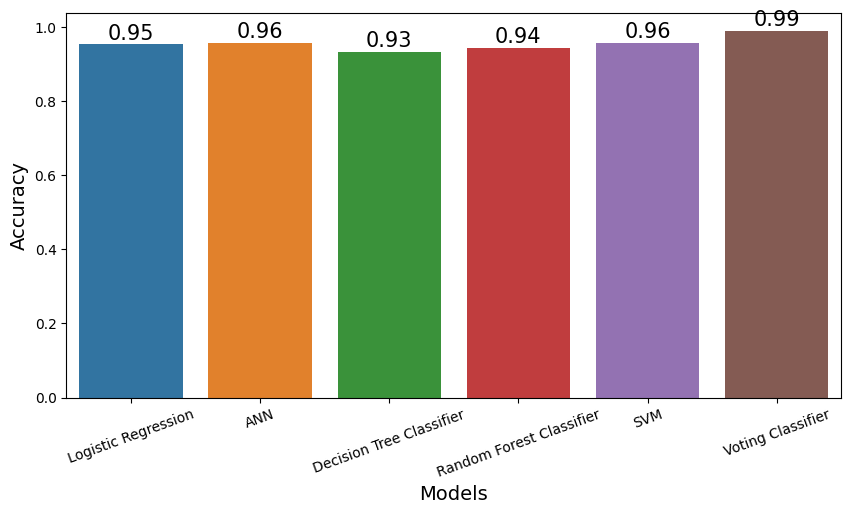

In [69]:
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=compare)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()